In [1]:
import pandas as pd # For DataFrame and handling
import numpy as np # Array and numerical processing
from scipy import stats
import seaborn as sns # High level Plotting
import statsmodels.api as sm # Modeling, e.g. ANOVA
from statsmodels.formula.api import ols 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

read the dataset

In [2]:

chicken_weights = pd.read_table("data/Chick Weights.txt")

Expore the dataset


In [3]:
chicken_weights.info()
chicken_weights.describe()
chicken_weights.head()
chicken_weights.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   weight  71 non-null     int64 
 1   feed    71 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


Index(['weight', 'feed'], dtype='object')

Calculate the mean and standard deviation for each group.

In [4]:
chicken_weights.groupby(['feed']).agg({'weight':['mean','std']})

weight           
                 mean        std
feed                            
casein     323.583333  64.433840
horsebean  160.200000  38.625841
linseed    218.750000  52.235698
meatmeal   276.909091  64.900623
soybean    246.428571  54.129068
sunflower  328.916667  48.836384

Calculate the number of chicks in each group

In [5]:
chicken_weights['feed'].value_counts()

soybean      14
linseed      12
sunflower    12
casein       12
meatmeal     11
horsebean    10
Name: feed, dtype: int64

Calculate a within-group z-score


In [6]:
numeric_columns = chicken_weights.select_dtypes(np.number)
c = numeric_columns.columns

chicken_weights[c] = chicken_weights.groupby(['feed'])[c].transform(stats.zscore)

print(chicken_weights)

      weight       feed
0   0.513049  horsebean
1  -0.005458  horsebean
2  -0.660414  horsebean
3   1.822961  horsebean
4   1.550062  horsebean
..       ...        ...
66  0.574101     casein
67 -1.743915     casein
68 -1.646655     casein
69 -0.657852     casein
70  0.136433     casein

[71 rows x 2 columns]


Produce a strip chart showing each chick as an individual data point

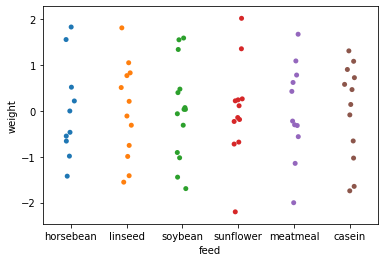

In [7]:
sns.stripplot(x= "feed", y = "weight", data= chicken_weights)

Calculate a 1-way ANOVA.


In [8]:

model = ols("weight ~ feed", chicken_weights)
results = model.fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
feed,7.753792e-30,5.0,1.419708e-30,1.0
Residual,7.100000e+01,65.0,NaN,NaN


Calculate Tukey’s post-hoc test (i.e. p-values for all pair-wise t-tests)


In [10]:

tuky_chick = pairwise_tukeyhsd(chicken_weights['weight'], chicken_weights['feed'])
print("full tukey")
print(tuky_chick)

full tukey
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj  lower  upper  reject
--------------------------------------------------------
   casein horsebean      0.0   0.9  -1.314  1.314  False
   casein   linseed     -0.0   0.9 -1.2529 1.2529  False
   casein  meatmeal     -0.0   0.9  -1.281  1.281  False
   casein   soybean     -0.0   0.9 -1.2073 1.2073  False
   casein sunflower     -0.0   0.9 -1.2529 1.2529  False
horsebean   linseed     -0.0   0.9  -1.314  1.314  False
horsebean  meatmeal     -0.0   0.9 -1.3409 1.3409  False
horsebean   soybean     -0.0   0.9 -1.2706 1.2706  False
horsebean sunflower     -0.0   0.9  -1.314  1.314  False
  linseed  meatmeal     -0.0   0.9  -1.281  1.281  False
  linseed   soybean      0.0   0.9 -1.2073 1.2073  False
  linseed sunflower     -0.0   0.9 -1.2529 1.2529  False
 meatmeal   soybean      0.0   0.9 -1.2365 1.2365  False
 meatmeal sunflower      0.0   0.9  -1.281  1.281  False
  soybean sunflower 